Test Name | Description
--- | ---
Major28_2016-2019_1entry | Test with initial pass at refactor and single entry per setup
Major28_2016-2019_v2 | add filter for spread:ATR ratio

In [1]:
import pytools.leantools as lt
import pandas as pd
import os
from IPython.display import display

In [2]:
script_dir = os.path.abspath('') #<-- absolute dir the script is in
result_dir = os.path.join (script_dir, "../results/parallax/backtest5")
test_name="ParallaxManualAlgorithm"
algo_result_filepath = os.path.join(result_dir, f'{test_name}.json')
analysis_data_filepath = os.path.join(result_dir, f'{test_name}-analysis_data.json')
SYMBOLS = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD', 'NZDUSD']
analysis_file_suffix = "-analysis_data"


In [3]:
# Print high level stats

stat_columns = ['TradeStats.TotalNumberOfTrades', 
             'TradeStats.ProfitLossRatio', 
             'PortfolioStats.AverageWinRate', 
             'PortfolioStats.AverageLossRate',
             'PortfolioStats.WinRate',
             'PortfolioStats.Drawdown',
            'PortfolioStats.TotalNetProfit']

def format_stats(stats_df):
    result = stats_df.transpose()
    result.loc['PortfolioStats.AverageWinRate'] = result.loc['PortfolioStats.AverageWinRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.AverageLossRate'] = result.loc['PortfolioStats.AverageLossRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.WinRate'] = result.loc['PortfolioStats.WinRate'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.Drawdown'] = result.loc['PortfolioStats.Drawdown'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.TotalNetProfit'] = result.loc['PortfolioStats.TotalNetProfit'].apply('{:,.2%}'.format)
    return result

def get_stats(symbols, timeframe):
    stats_list = []
    for s in symbols:
        name = f'{s}-{timeframe}'
        path = os.path.join(result_dir, f'{name}.json')
        stats = lt.get_trade_statistics(path)
        stats = stats[stat_columns]
        stats.rename(index={0:name}, inplace=True)
        stats_list.append(stats)

stats = lt.get_trade_statistics(algo_result_filepath)
stats = stats[stat_columns]
format_stats(stats)


,0
TradeStats.TotalNumberOfTrades,79
TradeStats.ProfitLossRatio,2.2767
PortfolioStats.AverageWinRate,2.32%
PortfolioStats.AverageLossRate,-1.01%
PortfolioStats.WinRate,31.6%
PortfolioStats.Drawdown,16.7%
PortfolioStats.TotalNetProfit,3.28%


https://stackoverflow.com/questions/38107304/pandas-changing-a-specific-row-to-percentages

In [4]:
bar_data_df = lt.get_bar_data_df(analysis_data_filepath)
bar_data_df['ratioTop'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['top'], axis = 1)
bar_data_df['ratioBody'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['body'], axis = 1)
bar_data_df['ratioBottom'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['bottom'], axis = 1)

In [5]:
bar_data_df

,,BBMid,BBUpper,BBLower,StochK,StochD,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom
Symbol,Time,,,,,,,,,,,,,,
AUDCAD,2015-12-27 22:00:00+00:00,0.9923,1.0141,0.9705,88.9204,85.6322,92.9,1.006415,1.010565,1.005210,1.008005,5.9,0.478058,0.296919,0.225023
AUDCHF,2015-12-27 22:00:00+00:00,0.7198,0.7421,0.6975,53.3313,43.8254,94.9,0.716850,0.719205,0.716085,0.716420,6.2,0.754808,0.137821,0.107372
AUDJPY,2015-12-27 22:00:00+00:00,88.2091,90.4990,85.9191,32.4129,30.1040,100.4,87.388500,87.642000,87.236000,87.276500,4.5,0.624384,0.275862,0.099754
AUDNZD,2015-12-27 22:00:00+00:00,1.0746,1.1018,1.0475,10.9580,13.1909,92.0,1.064145,1.066020,1.058510,1.058855,12.5,0.249667,0.704394,0.045939
AUDUSD,2015-12-27 22:00:00+00:00,0.7245,0.7355,0.7135,67.8999,61.6674,79.8,0.726580,0.728370,0.724840,0.724915,2.9,0.507082,0.471671,0.021246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZDJPY,2017-12-28 22:00:00+00:00,78.7583,80.6639,76.8527,90.6080,93.2030,53.7,79.993500,80.177500,79.818000,79.955000,20.0,0.511822,0.107093,0.381085
NZDUSD,2017-12-28 22:00:00+00:00,0.6972,0.7130,0.6815,90.8272,93.8763,51.9,0.708485,0.712435,0.707880,0.708880,20.0,0.780461,0.086718,0.132821
USDCAD,2017-12-28 22:00:00+00:00,1.2766,1.2958,1.2573,8.9041,8.4949,85.2,1.257050,1.259075,1.251475,1.257990,11.0,0.142763,0.123684,0.733553


In [6]:
closed_trades = lt.get_closed_trades_df(algo_result_filepath).drop(columns=['Direction', 'TotalFees', 'MAE', 'MFE', 'Symbol.ID', 'Symbol.Permtick'])
#closed_trades

Grab the trade signals

In [7]:
def get_r_multiple(row):
    if row.slPips != 0:
        return row.plPips / row.slPips
    else:
        return 0

trade_setups_df = lt.get_trade_setups_df(analysis_data_filepath)
# calculate some additional data
trade_setups_df['year'] = trade_setups_df.apply(lambda row: row.name.year, axis = 1)
trade_setups_df['weekday'] = trade_setups_df.apply(lambda row: row.name.weekday(), axis = 1)
trade_setups_df['RMultiple'] = trade_setups_df.apply(get_r_multiple, axis = 1)


#pd.set_option('display.max_rows', 500)
#display(trade_setups_df)
trade_setups_df.reset_index(inplace=True)
trade_setups_df.style
trade_setups_df.to_csv("test.csv")
#pd.reset_option('display.max_rows')

In [8]:
# Show R multiple grouped by symbol
r_by_symbol = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['symbol']).sum()
r_by_symbol.sort_values('RMultiple').style.hide_columns(['year', 'tradeIndex'])

,entryPrice,slPrice,tpPrice,fillPrice,canceled,slPips,tpPips,plPips,weekday,RMultiple
symbol,,,,,,,,,,
EURCHF,4.445000,4.449640,4.433870,4.445000,False,129.000000,303.100000,-129.000000,5,-4.000000
AUDUSD,5.291920,5.299770,5.273940,5.291900,False,231.300000,542.800000,-141.300000,19,-3.892148
AUDJPY,416.317000,417.820000,412.838000,416.553000,False,242.700000,561.900000,-67.600000,12,-1.266055
EURAUD,5.999630,5.999520,5.999880,5.999630,False,292.700000,670.900000,-8.600000,8,-0.854226
CHFJPY,452.500000,450.476000,457.109000,452.500000,False,259.400000,595.700000,-167.600000,6,-0.689450
CADJPY,339.563000,339.711000,339.233000,339.607000,False,176.800000,410.400000,-53.300000,7,-0.618488
EURJPY,847.145000,848.372000,844.290000,847.268000,False,472.300000,1084.100000,-105.200000,22,-0.225228
CADCHF,4.552910,4.565760,4.522720,4.552910,False,192.700000,452.700000,15.700000,16,0.446884
EURCAD,8.802250,8.805350,8.795960,8.802250,False,472.200000,1080.700000,329.900000,17,0.497542


In [9]:
sum_r_group = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['year','weekday'])[['RMultiple']].sum()
#sum_r_group.plot(kind='bar', figsize=(20,5))

#pd.set_option('display.max_rows', 500)
display(sum_r_group)
#pd.reset_option('display.max_rows')

RMultiple
year weekday           
2016 0        -7.995430
     1         1.505118
     2        -0.048941
     3        -7.437683
     6         0.895771
2017 0         0.441815
     1         2.190855
     2         6.068905
     3        -0.334068
     6         8.563517

In [39]:
# Combine signal data with closed trade data
merged_trade_data = trade_setups_df.join(closed_trades, on='tradeIndex')
#merged_trade_data.style

tmp_data = merged_trade_data[['BarTime', 'symbol', 'direction', 'RMultiple', 'tradeIndex']].sort_values(by=['BarTime', 'symbol'])
def get_result_word(row):
    if row.tradeIndex == -1:
        return "NoEntry"
    elif row.RMultiple > 0:
        return "Win"
    elif row.RMultiple < 0:
        return "Lose"
    else:
        return "ERROR"
tmp_data['Result'] = tmp_data.apply(get_result_word, axis=1)
tmp_data.style
#tmp_data.to_csv('tmp_data.csv')

,BarTime,symbol,direction,RMultiple,tradeIndex,Result
0,2016-01-06 22:00:00+00:00,CHFJPY,Buy,-1.028230,0,Lose
1,2016-01-06 22:00:00+00:00,EURJPY,Buy,-1.000000,1,Lose
2,2016-01-19 22:00:00+00:00,EURCAD,Sell,2.263345,2,Win
3,2016-01-24 22:00:00+00:00,AUDUSD,Sell,-1.018223,3,Lose
4,2016-01-31 22:00:00+00:00,AUDNZD,Sell,2.303351,4,Win
7,2016-02-01 22:00:00+00:00,AUDJPY,Sell,0.000000,-1,NoEntry
5,2016-02-01 22:00:00+00:00,CADJPY,Sell,0.000000,-1,NoEntry
6,2016-02-01 22:00:00+00:00,EURJPY,Sell,0.000000,-1,NoEntry
8,2016-02-11 22:00:00+00:00,EURGBP,Sell,0.000000,-1,NoEntry
10,2016-02-23 22:00:00+00:00,CHFJPY,Buy,-1.026132,6,Lose


In [11]:
merged_trade_data.reset_index(inplace=True)
merged_trade_data.set_index(['symbol', 'BarTime'])

,,index,direction,entryPrice,slPrice,tpPrice,entryTime,fillPrice,closeTime,canceled,slPips,...,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value
symbol,BarTime,,,,,,,,,,,,,,,,,,,,,
CHFJPY,2016-01-06 22:00:00+00:00,0,Buy,118.08500,117.16400,120.18600,2016-01-08T14:06:00Z,118.08500,2016-01-11T15:57:00Z,False,92.1,...,-1.028230,2016-01-08T14:06:00Z,118.08500,127763.0,2016-01-11T15:57:00Z,117.13800,-1031.17,3.01:51:00,-1535.32,CHFJPY
EURJPY,2016-01-06 22:00:00+00:00,1,Buy,128.18600,127.18100,130.47800,2016-01-08T14:02:00Z,128.18600,2016-01-20T08:49:00Z,False,100.5,...,-1.000000,2016-01-08T14:02:00Z,128.18600,117084.0,2016-01-20T08:49:00Z,127.18100,-1013.84,11.18:47:00,-1579.27,EURJPY
EURCAD,2016-01-19 22:00:00+00:00,2,Sell,1.58318,1.60285,1.53866,2016-01-21T06:45:00Z,1.58318,2016-01-22T09:55:00Z,False,196.7,...,2.263345,2016-01-21T06:45:00Z,1.58318,72229.0,2016-01-22T09:55:00Z,1.53866,2265.10,1.03:10:00,-8.14,EURCAD
AUDUSD,2016-01-24 22:00:00+00:00,3,Sell,0.69702,0.70141,0.68682,2016-01-26T10:56:00Z,0.69702,2016-01-26T17:07:00Z,False,43.9,...,-1.018223,2016-01-26T10:56:00Z,0.69702,228320.0,2016-01-26T17:07:00Z,0.70149,-1020.59,06:11:00,-1057.12,AUDUSD
AUDNZD,2016-01-31 22:00:00+00:00,4,Sell,1.08674,1.09241,1.07368,2016-02-01T22:07:00Z,1.08674,2016-02-03T00:42:00Z,False,56.7,...,2.303351,2016-02-01T22:07:00Z,1.08674,267471.0,2016-02-03T00:42:00Z,1.07368,2282.53,1.02:35:00,-84.76,AUDNZD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EURAUD,2017-11-20 22:00:00+00:00,98,Sell,1.54920,1.55636,1.53278,2017-11-22T01:13:00Z,1.54920,2017-11-22T09:46:00Z,False,71.6,...,-1.000000,2017-11-22T01:13:00Z,1.54920,185088.0,2017-11-22T09:46:00Z,1.55636,-1001.79,08:33:00,-1152.20,EURAUD
EURGBP,2017-11-22 22:00:00+00:00,99,Buy,0.89006,0.88771,0.89568,2017-11-24T08:09:00Z,0.89006,2017-11-24T17:11:00Z,False,23.5,...,2.391489,2017-11-24T08:09:00Z,0.89006,317981.0,2017-11-24T17:11:00Z,0.89568,2380.10,09:02:00,-118.58,EURGBP
EURCAD,2017-12-05 22:00:00+00:00,100,Buy,1.50550,1.49597,1.52725,0001-01-01T00:00:00,0.00000,2017-12-07T14:59:00Z,True,95.3,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://pandas.pydata.org/docs/user_guide/merging.html#timeseries-friendly-merging

In [12]:
# Merge trade data with bar data

# only grab attempted trades
attempted_trades = merged_trade_data[(merged_trade_data['slPips'] > 0)]
merged_setups = pd.merge(attempted_trades, bar_data_df, left_on=['symbol', 'BarTime'], right_on=['Symbol','Time'])
#merged_setups = pd.merge(attempted_trades, bar_data_df, left_index=True, right_on=['Symbol','Time'])

#merged_setups['range'] = merged_setups.apply(lambda row: (row.H - row.L) / 0.0001, axis = 1)
#merged_setups['rangeAtrRatio'] = merged_setups.apply(lambda row: row.range / row.atrPips, axis = 1)

# Calculate direction wick
def get_direction_wick(row):
    if row.direction == 'Sell':
        return row.ratioBottom
    else:
        return row.ratioTop
merged_setups['directionWickRatio'] = merged_setups.apply(get_direction_wick, axis=1)

# Calculate middle bb distance
def get_midbb_dist(row):
    if row.direction == 'Sell':
        return lt.invLerp(row.BBUpper, row.BBMid, row.C)
    else:
        return lt.invLerp(row.BBLower, row.BBMid, row.C)
    
merged_setups['bbMidDist'] = merged_setups.apply(get_midbb_dist, axis=1)

merged_setups['bodyAtrRatio'] = merged_setups.apply(lambda row: (abs(row.O - row.C) / lt.getPipSize(row.symbol)) / row.atrPips, axis=1)

def color_returns(val):
    if val <= 0:
        return 'color: red'
    else:
        return 'color: green'

merged_setups.reset_index()
merged_setups.set_index(['symbol', 'BarTime'])
#merged_setups.style.applymap(color_returns, subset=['RMultiple'])    
#merged_setups.style.hide_columns(['year', 'EntryTime', 'Quantity'])

#formatted = merged_setups[['symbol', 'RMultiple', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom', 'directionWickRatio']]
#formatted.style.applymap(color_returns, subset=['RMultiple'])

merged_setups['spreadAtrRatio'] = merged_setups.apply(lambda row: row.spread / row.atrPips, axis=1)
merged_setups[merged_setups['spread'] >= merged_setups['slPips']][['BarTime', 'symbol', 'atrPips', 'spread', 'slPips', 'RMultiple', 'spreadAtrRatio']].style
merged_setups.apply(lambda row: row.slPips - row.spread, axis=1).describe()

count    103.000000
mean      42.435922
std       24.138322
min       10.300000
25%       26.850000
50%       38.700000
75%       49.700000
max      188.400000
dtype: float64

In [13]:
#merged_closed_trades = merged_setups
merged_setups = merged_setups[(merged_setups['tradeIndex'] >= 0)]
winning_trades = merged_setups[(merged_setups['plPips'] > 0)]
losing_trades = merged_setups[(merged_setups['plPips'] < 0)]
describeColumns = ['slPips', 'tpPips', 'atrPips', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom']
winning_trades_desc = winning_trades.describe()[describeColumns]
losing_trades_desc = losing_trades.describe()[describeColumns]

#print(len(winning_trades))
#print(len(losing_trades))
#merged_setups[(merged_setups['RMultiple'] > -0.5) & (merged_setups['RMultiple'] < 0.5)]

5.11184670559392

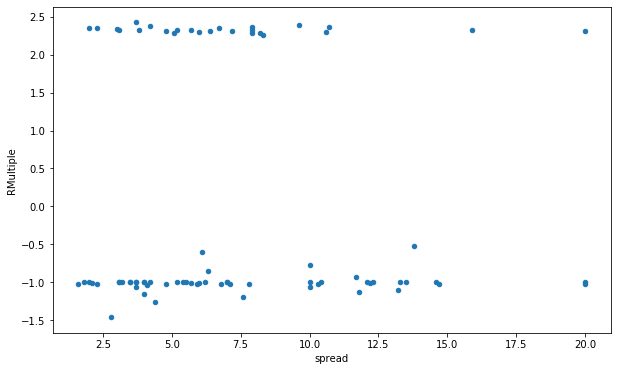

In [14]:
#winning_trades.bbMidDist.plot.hist(bins=50)
#merged_setups[merged_setups['spread'] >= 25]
merged_setups.plot.scatter(x='spread', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bodyAtrRatio'] > 0.33].RMultiple.sum()

3.5576202158385364

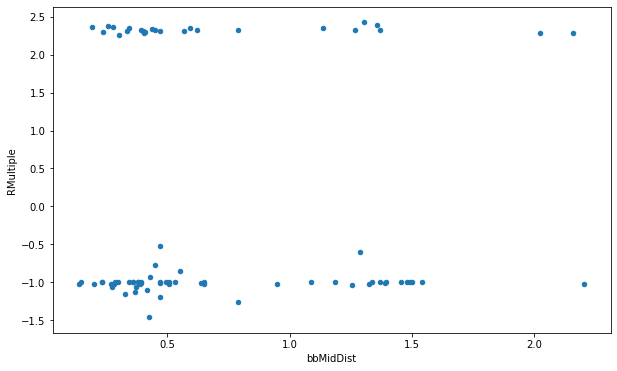

In [15]:
merged_setups.plot.scatter(x='bbMidDist', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bbMidDist'] > 2].RMultiple.sum()

-15.711209913961495

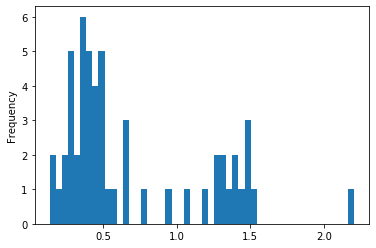

In [16]:
losing_trades.bbMidDist.plot.hist(bins=50)
losing_trades[losing_trades['bbMidDist'] >= 0.9].RMultiple.sum()

4.628257476431292

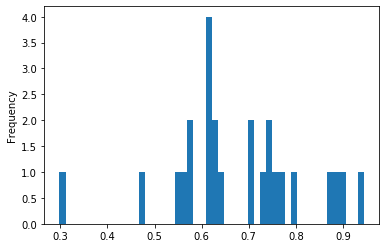

In [17]:
#winning_trades_desc
#winning_trades
winning_trades.ratioBody.plot.hist(bins=50)
winning_trades[winning_trades['ratioBody'] < 0.5].RMultiple.sum()

In [18]:
#todo: look at size relative to ATR